In [1]:
import pandas as pd
import seaborn as sn
from sklearn.feature_selection import chi2, SelectKBest


In [2]:
df = pd.read_csv('C:\\Users\\Minh Chi\\Downloads\\boDuLieu\\lap 7-8\\house.csv')


In [3]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [56]:
import numpy as np
df.describe(include=np.number)

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000,11598.000000,11661.000000,6077.000000,6924.000000,11661.000000,11661.000000,11661.000000
mean,11560.186519,3.099305,10.766855,3104.795644,3.072464,1.584512,1.691757,651.063974,163.708464,1962.145147,-37.744978,144.760228,7319.439585
std,6608.582499,0.895050,5.947577,94.579340,0.911324,0.707226,0.991602,4299.561697,584.486961,38.278983,1.527140,5.849349,4399.975758
min,1.000000,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1196.000000,-38.182550,0.000000,249.000000
25%,5755.000000,3.000000,6.900000,3044.000000,3.000000,1.000000,1.000000,270.000000,104.000000,1936.750000,-37.856520,144.923790,4019.000000
50%,11764.000000,3.000000,10.200000,3083.000000,3.000000,1.000000,2.000000,533.000000,134.000000,1965.000000,-37.796200,145.003040,6482.000000
75%,17274.000000,4.000000,13.500000,3147.000000,4.000000,2.000000,2.000000,676.000000,183.000000,1997.000000,-37.749800,145.066500,9758.000000
max,23545.000000,10.000000,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,0.000000,145.526350,21650.000000


In [60]:
df.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,11661,11661,11661,11661,11661,11661,10291,11661
unique,313,11482,3,5,253,58,33,8
top,Reservoir,2 Bruce St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,337,3,9291,7939,1360,435,1030,3661


In [7]:
df.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Price_lable'],
      dtype='object')

In [62]:
# phát hiện miss
num_col = df.columns[df.isnull().any()]
print(df[num_col].isnull().sum())

Car               63
BuildingArea    5584
YearBuilt       4737
CouncilArea     1370
dtype: int64


In [ ]:
Q1 = df['BuildingArea'].quantile(.25)


In [13]:
data = df.copy()



In [14]:
data.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11661 entries, 0 to 11660
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     11661 non-null  int64   
 1   Suburb         11661 non-null  object  
 2   Address        11661 non-null  object  
 3   Rooms          11661 non-null  int64   
 4   Type           11661 non-null  object  
 5   Method         11661 non-null  object  
 6   SellerG        11661 non-null  object  
 7   Date           11661 non-null  object  
 8   Distance       11661 non-null  float64 
 9   Postcode       11661 non-null  int64   
 10  Bedroom2       11661 non-null  int64   
 11  Bathroom       11661 non-null  int64   
 12  Car            11598 non-null  float64 
 13  Landsize       11661 non-null  int64   
 14  BuildingArea   6077 non-null   float64 
 15  YearBuilt      6924 non-null   float64 
 16  CouncilArea    10291 non-null  object  
 17  Lattitude      11661 non-null  

In [15]:
# xử lý dữ liệu thiếu của numberic
cols = ['Car', 'BuildingArea', 'YearBuilt']
for col in cols:
    data[col] = data[col].fillna(data[col].mean())

In [16]:
# xử lý dữ liệu thiếu của object
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode().iloc[0])

In [17]:
# 2. Convert sang datetime
# Nếu format của bạn là 'dd/mm/yy':
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')




C:\Users\Minh Chi\AppData\Local\Temp\ipykernel_5820\3671154158.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')


In [18]:
#thay thế giá trị thiếu bằng các trường này 
data['Year']  = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day']   = data['Date'].dt.day

In [19]:
cols_to_drop = ['Unnamed: 0', 'Address', 'Date']
data.drop(cols_to_drop, axis=1, inplace=True)



In [20]:
#liêt kê các cột objec ra để biên về one-hot
cols = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
#

data = pd.get_dummies(data, columns= cols, drop_first=True)

In [21]:
data.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.5,3067,2,1,1.0,202,163.708464,1962.145147,-37.7996,...,False,True,False,False,True,False,False,False,False,False
1,2,2.5,3067,2,1,0.0,156,79.000000,1900.000000,-37.8079,...,False,True,False,False,True,False,False,False,False,False
2,3,2.5,3067,3,2,0.0,134,150.000000,1900.000000,-37.8093,...,False,True,False,False,True,False,False,False,False,False
3,3,2.5,3067,3,2,1.0,94,163.708464,1962.145147,-37.7969,...,False,True,False,False,True,False,False,False,False,False
4,4,2.5,3067,3,1,2.0,120,142.000000,2014.000000,-37.8072,...,False,True,False,False,True,False,False,False,False,False


In [22]:
# bắt đầu chuẩn hóa min max
from sklearn.preprocessing import MinMaxScaler
#tạo tuổi mới cho căn nhà từ yearBuilt
data['HouseAge'] = 2025 - data['YearBuilt'] # Số năm lớn không phản ánh rõ độ cũ/mới → nên chuyển thành “tuổi” rồi mới chuẩn hóa 
data.drop(columns='YearBuilt', inplace=True)

scater = MinMaxScaler()
data[['Lattitude', 'HouseAge', 'BuildingArea', 'Landsize']] = scater.fit_transform(data[['Lattitude', 'HouseAge', 'BuildingArea', 'Landsize']])


In [23]:
data.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,HouseAge
0,2,2.5,3067,2,1,1.0,0.000464,0.003678,0.010029,144.9984,...,True,False,False,True,False,False,False,False,False,0.067950
1,2,2.5,3067,2,1,0.0,0.000358,0.001775,0.009812,144.9934,...,True,False,False,True,False,False,False,False,False,0.143552
2,3,2.5,3067,3,2,0.0,0.000307,0.003370,0.009775,144.9944,...,True,False,False,True,False,False,False,False,False,0.143552
3,3,2.5,3067,3,2,1.0,0.000215,0.003678,0.010100,144.9969,...,True,False,False,True,False,False,False,False,False,0.067950
4,4,2.5,3067,3,1,2.0,0.000275,0.003190,0.009830,144.9941,...,True,False,False,True,False,False,False,False,False,0.004866


In [ ]:
cut_lable = ['Low', 'meadium', 'high']
cut_bin = [0, 300000, 5000000, 1000000000]
df['Price_lable'] = pd.cut(df['Price'], bins = cut_bin, labels= cut_lable)
df.drop('Price', axis= 1, inplace=True)


In [25]:
#tiến hành chọn thuộc tính
from sklearn.model_selection import train_test_split
X = data.drop(columns='Price_lable') # biến đầu vào
y = data['Price_lable'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
data['Price_lable'].value_counts()

Price_lable
meadium    11585
Low           55
high          21
Name: count, dtype: int64

In [29]:
# xử lý dữ liệu mất cần bằng
data['Price_lable'].value_counts()
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [30]:
X_train_bal.shape, y_train_bal.shape

((27783, 624), (27783,))

In [39]:
# lựa chọn thuộc tính selecKbest
# chọn k tốt nhất (chi2)
#Xem điểm trước

# select = SelectKBest(score_func=chi2, k = 5)
# select.fit(X_train, y_train)

# df_score = pd.DataFrame({
#     'feature: ': X_train.columns,
#     'chi2_score': select.scores_
# }).sort_values(by='chi2_score', ascending=False)
# print(df_score)


#hoặc là tiến hàng làm sau khi chọn test luôn

select = SelectKBest(score_func=chi2, k = 5)
X_train_sel = select.fit_transform(X_train_bal, y_train_bal)
X_test_sel = select.transform(X_test)

# # Xem tên các cột được chọn
selected_features = X_train.columns[select.get_support()]
print("5 đặc trưng tốt nhất:", selected_features.tolist())

5 đặc trưng tốt nhất: ['Rooms', 'Bedroom2', 'Propertycount', 'Day', 'Type_u']


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_full = DecisionTreeClassifier(random_state=True);

#huấn luyện dữ liệu sau khi chọn và y train sau cân bằng
tree_full.fit(X_train_sel, y_train_bal)
#dự đoán
y_pred_tree = tree_full.predict(X_test_sel)

In [34]:
target = data['Price_lable'].unique()
target


['meadium', 'Low', 'high']
Categories (3, object): ['Low' < 'meadium' < 'high']

In [38]:
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11661 entries, 0 to 11660
Columns: 625 entries, Rooms to HouseAge
dtypes: bool(609), category(1), float64(7), int32(3), int64(5)
memory usage: 8.0 MB


In [40]:
from sklearn import datasets
from sklearn import tree
from IPython.display import Image
import pydotplus

#create dot data
dot_data = tree.export_graphviz(tree_full,
                                out_file=None,
                                feature_names=selected_features,
                                class_names=target)


In [43]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.738012 to fit



In [44]:
# đánh giá hiệu xuất
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred_tree)
print('Accuracy: ', acc)


print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred_tree))


print('Classification report: ')
print(classification_report(y_test, y_pred_tree))

Accuracy:  0.9592798971281612
Confusion matrix: 
[[   1    0    4]
 [   0    1    3]
 [  29   59 2236]]
Classification report: 
              precision    recall  f1-score   support

         Low       0.03      0.20      0.06         5
        high       0.02      0.25      0.03         4
     meadium       1.00      0.96      0.98      2324

    accuracy                           0.96      2333
   macro avg       0.35      0.47      0.36      2333
weighted avg       0.99      0.96      0.98      2333



In [ ]:
# Thử với ramdom forest nêu bạn chon

In [45]:
#Tiếp theo vẽ Roc curve và tính Auc mô hình trên
#chuyển y_test về nhị phân
from sklearn.preprocessing import label_binarize
#giả sử bạn phân thành 3 lớp thị low, meadium, high
y_test_bin = label_binarize(y_test, classes=['low', 'meadium', 'high'])
n_classes = y_test_bin.shape[1]
n_classes

3

In [47]:
#Lấy xác xuất dự đoán
y_score = tree_full.predict_proba(X_test_sel)


In [48]:
#tính roc, và auc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

d:\learn_PyThon\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


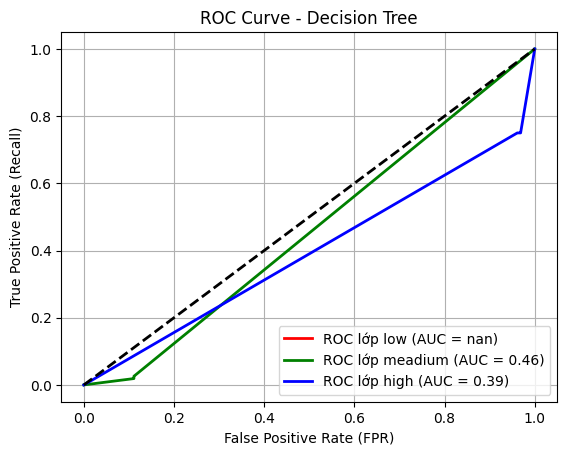

In [49]:
colors = ['red', 'green', 'blue']
class_names = ['low', 'meadium', 'high']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC lớp {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) #lw: light width: độ dày cảu đường\
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
# plt.tight_layout()
plt.show()


In [50]:
# tiếp theo mình sẽ tới phân cụm 
 #đầu tiên phân cụm k cần nhãn thì xóa  nhãn price_lable
x_cluster = data.drop(columns='Price_lable', errors='ignore')



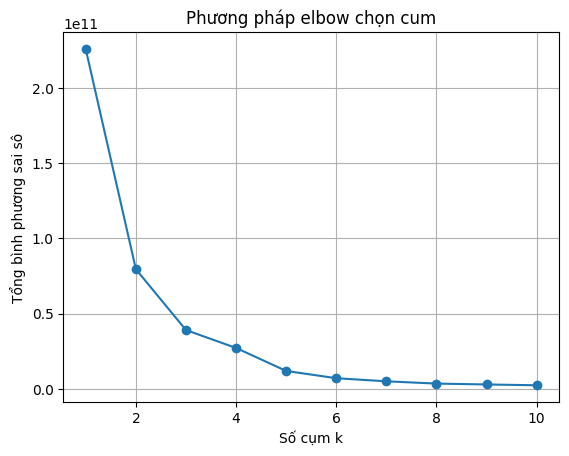

In [51]:
#Xác định cụm tối ưu bằng elbow
from sklearn.cluster import KMeans

sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_cluster)
    sse.append(kmeans.inertia_) #tổng sai số của các cụm

#vẽ biểu đồ
plt.plot(K, sse, marker = 'o')
plt.xlabel('Số cụm k');
plt.ylabel('Tổng bình phương sai sô')
plt.title('Phương pháp elbow chọn cum')
plt.grid(True)
plt.show()

In [52]:
#phân cụm kmeans với k = 4
kmeans = KMeans(n_clusters=5, random_state=43)
cluster_lables = kmeans.fit_predict(x_cluster)

data['cluster'] = cluster_lables

In [53]:
#nhóm theo cluster  và so sánh giá trị trung bình từng cột để diễn giải 

# Trung bình mỗi cụm
cluster_summary = data.groupby('cluster').mean(numeric_only=True)
cluster_summary


,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,HouseAge
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.137620,10.160081,3087.377757,3.108108,1.620690,1.689221,0.001656,0.003698,0.010644,144.840891,...,0.043181,0.000000,0.000000,0.150668,0.004349,0.022678,0.285182,0.383660,0.005592,0.069254
1,2.895138,10.241468,3100.900858,2.872259,1.426120,1.605776,0.001636,0.003327,0.010607,144.996240,...,0.178265,0.000000,0.015253,0.779790,0.000000,0.021926,0.081030,0.060057,0.000000,0.065787
2,3.107747,10.808848,3122.895006,3.084153,1.615415,1.718712,0.001460,0.003601,0.011570,144.728740,...,0.000000,0.003539,0.007078,0.278018,0.002359,0.060165,0.425088,0.145891,0.000000,0.066274
3,3.100136,11.496504,3098.042091,3.077054,1.551935,1.684420,0.001452,0.003849,0.013494,144.495435,...,0.053971,0.003055,0.006110,0.221656,0.007128,0.053632,0.215886,0.310251,0.004752,0.066313
4,3.134454,10.897111,3122.664916,3.099790,1.619748,1.718768,0.001296,0.003675,0.010016,144.945590,...,0.000000,0.000000,0.000000,0.341387,0.000000,0.018382,0.494223,0.058298,0.000000,0.071708


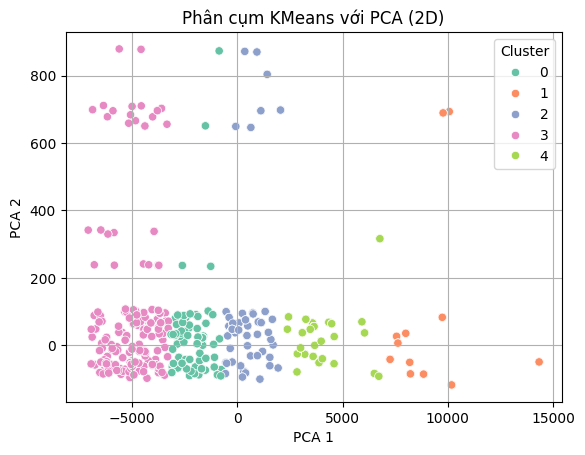

In [54]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_cluster)

sns.scatterplot(x=X_pca[:, 0], # trục x
                 y=X_pca[:, 1], #trục y
                hue=cluster_lables # màu theo cột 
                , palette='Set2')
plt.title('Phân cụm KMeans với PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(title='Cluster')
# plt.tight_layout()
plt.show()


In [55]:
#Luật kết hợp: để dùng đc thì phải chuyển toàn bộ về 0 1
from mlxtend.frequent_patterns import apriori, association_rules


# tìm tập mục thường xuyên( mục tiêu để tìm tập hợp nào xuất hiện ít nhất trong 40% giao dịch )
frequent_itemsets = apriori(data, min_support=0.4, use_colnames=True)
frequent_itemsets


d:\learn_PyThon\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [ ]:
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.85)
# X ⇒ Y thỏa mãn độ tin cậy (confidence) ≥ 0.85, đồng thời support của X∪Y vẫn ≥ min_support bạn đã đặt trước đó.
rules